<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [4]:
!pip install seaborn
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Using cached statsmodels-0.14.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.7 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
# We clean the data first
boston_df.drop(columns=['Unnamed: 0'], inplace=True)

<h2>Task 2: Generate Descriptive Statistics and Visualizations</h2>

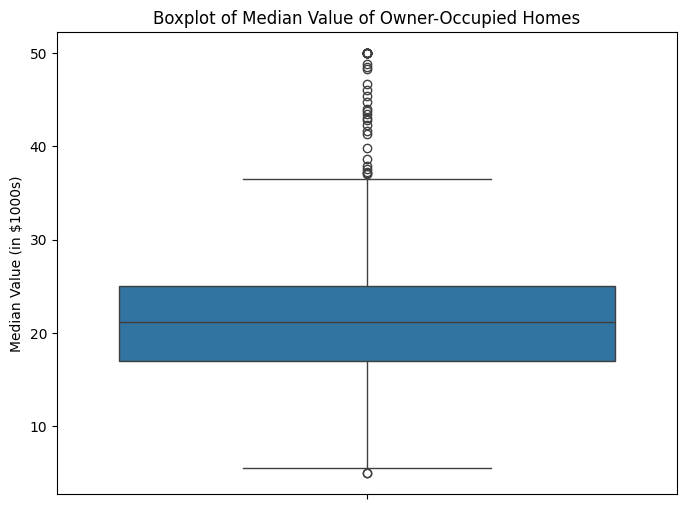

In [11]:
# Boxplot of MEDV - Median value of owner-occupied homes in $1000's
plt.figure(figsize=(8, 6))
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value (in $1000s)')
plt.show()

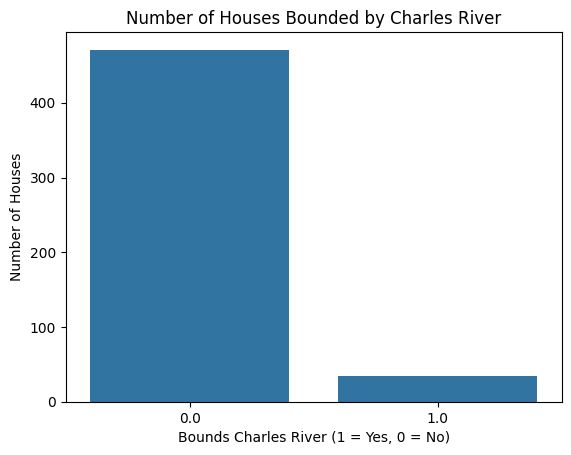

In [12]:
# Bar Plot for CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
sns.countplot(x='CHAS', data=boston_df)
plt.title('Number of Houses Bounded by Charles River')
plt.xlabel('Bounds Charles River (1 = Yes, 0 = No)')
plt.ylabel('Number of Houses')
plt.show()

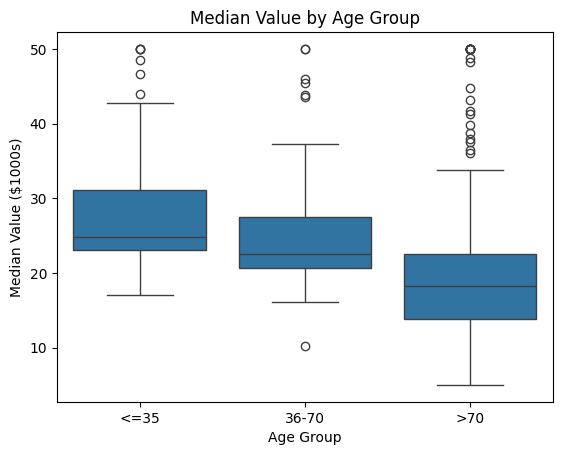

In [13]:
# Boxplot of MEDV vs AGE Groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'],
                                 bins=[0, 35, 70, 100],
                                 labels=['<=35', '36-70', '>70'])

sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Median Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

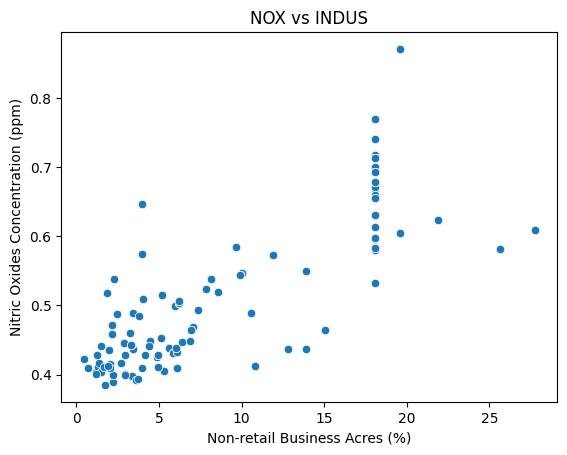

In [14]:
# Scatter Plot (nitric oxides concentration vs proportion of non-retail business acres per town)
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('NOX vs INDUS')
plt.xlabel('Non-retail Business Acres (%)')
plt.ylabel('Nitric Oxides Concentration (ppm)')
plt.show()

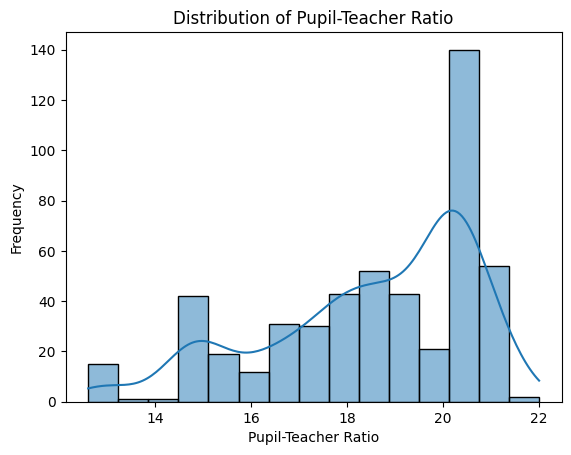

In [15]:
# Histogram for Pupil-Teacher Ratio
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title('Distribution of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

<h2>Task 3: Use the appropriate tests to answer the questions provided</h2>

In [16]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

from scipy.stats import ttest_ind

chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_val = ttest_ind(chas1, chas0)

print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


<b>Conclusion:</b> There is a statistically significant difference in the median value of homes depending on whether they are bounded by the Charles River or not.

In [17]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

from scipy.stats import f_oneway

group1 = boston_df[boston_df['AGE_GROUP'] == '<=35']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == '36-70']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '>70']['MEDV']

f_stat, p_val = f_oneway(group1, group2, group3)

print("F-statistic:", f_stat)
print("P-value:", p_val)

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


<b>Conclusion:</b> There is a significant difference in median home values between the different age groups 

In [18]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

from scipy.stats import pearsonr

corr, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Correlation coefficient:", corr)
print("P-value:", p_val)

Correlation coefficient: 0.7636514469209151
P-value: 7.913361061239527e-98


<b>Conclusion:</b> There is a strong positive linear correlation between NOX (pollution) and INDUS (industrial land use).

In [19]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

import statsmodels.api as sm

X = sm.add_constant(boston_df['DIS'])  # add intercept
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.21e-08
Time:                        11:53:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

<b>Conclusion:</b> 

    Since p < 0.05, we reject the null hypothesis that distance has no impact.

    There is a statistically significant relationship: for every 1 unit increase in DIS, the median home value increases by ~$1,091.

    However, R² is only 6.2%, meaning distance explains only a small portion of the variation in home values — other factors play larger roles.